Step 1: Loading Libraries

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

Step 2: Data Loading and pre-preparation

In [2]:
data = pd.read_csv('combined_Data.csv')
data.head()

,Time,Interval Start,Interval End,Location,Location Type,Market,SPP
0,2024-07-13 00:00:00-05:00,2024-07-13 00:00:00-05:00,2024-07-13 01:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.82
1,2024-07-13 01:00:00-05:00,2024-07-13 01:00:00-05:00,2024-07-13 02:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.76
2,2024-07-13 02:00:00-05:00,2024-07-13 02:00:00-05:00,2024-07-13 03:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.51
3,2024-07-13 03:00:00-05:00,2024-07-13 03:00:00-05:00,2024-07-13 04:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.07
4,2024-07-13 04:00:00-05:00,2024-07-13 04:00:00-05:00,2024-07-13 05:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.22


In [3]:
# Convert time columns to datetime
data['Time'] = pd.to_datetime(data['Time'])


# Separate Day-Ahead and Real-Time data
da_data = data[data['Market'] == 'Day_Ahead']
rt_data = data[data['Market'] == 'Real_Time']
data.head()

,Time,Interval Start,Interval End,Location,Location Type,Market,SPP
0,2024-07-13 00:00:00-05:00,2024-07-13 00:00:00-05:00,2024-07-13 01:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.82
1,2024-07-13 01:00:00-05:00,2024-07-13 01:00:00-05:00,2024-07-13 02:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.76
2,2024-07-13 02:00:00-05:00,2024-07-13 02:00:00-05:00,2024-07-13 03:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.51
3,2024-07-13 03:00:00-05:00,2024-07-13 03:00:00-05:00,2024-07-13 04:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,15.07
4,2024-07-13 04:00:00-05:00,2024-07-13 04:00:00-05:00,2024-07-13 05:00:00-05:00,MOZART_WIND1,Resource Node,Day_Ahead,14.22


In [4]:
rt_data

,Time,Interval Start,Interval End,Location,Location Type,Market,SPP
528,2024-08-04 23:45:00-05:00,2024-08-04 23:45:00-05:00,2024-08-05 00:00:00-05:00,MOZART_WIND1,Resource Node,Real_Time,-0.94
553,2024-08-05 00:00:00-05:00,2024-08-05 00:00:00-05:00,2024-08-05 00:15:00-05:00,MOZART_WIND1,Resource Node,Real_Time,0.21
554,2024-08-05 00:15:00-05:00,2024-08-05 00:15:00-05:00,2024-08-05 00:30:00-05:00,MOZART_WIND1,Resource Node,Real_Time,4.89
555,2024-08-05 00:30:00-05:00,2024-08-05 00:30:00-05:00,2024-08-05 00:45:00-05:00,MOZART_WIND1,Resource Node,Real_Time,4.97
556,2024-08-05 00:45:00-05:00,2024-08-05 00:45:00-05:00,2024-08-05 01:00:00-05:00,MOZART_WIND1,Resource Node,Real_Time,6.82
...,...,...,...,...,...,...,...
1473,2024-08-12 20:00:00-05:00,2024-08-12 20:00:00-05:00,2024-08-12 20:15:00-05:00,MOZART_WIND1,Resource Node,Real_Time,32.64
1474,2024-08-12 20:15:00-05:00,2024-08-12 20:15:00-05:00,2024-08-12 20:30:00-05:00,MOZART_WIND1,Resource Node,Real_Time,35.45
1475,2024-08-12 20:30:00-05:00,2024-08-12 20:30:00-05:00,2024-08-12 20:45:00-05:00,MOZART_WIND1,Resource Node,Real_Time,36.35
1476,2024-08-12 20:45:00-05:00,2024-08-12 20:45:00-05:00,2024-08-12 21:00:00-05:00,MOZART_WIND1,Resource Node,Real_Time,30.73


In [5]:
da_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)
rt_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)
print(da_data)

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_7271/2650351065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)

WARNING - (py.warnings._showwarnmsg) - /var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_7271/2650351065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data.rename(columns={'Time': 'ds', 'SPP': 'y'}, inplace=True)



                            ds             Interval Start  \
0    2024-07-13 00:00:00-05:00  2024-07-13 00:00:00-05:00   
1    2024-07-13 01:00:00-05:00  2024-07-13 01:00:00-05:00   
2    2024-07-13 02:00:00-05:00  2024-07-13 02:00:00-05:00   
3    2024-07-13 03:00:00-05:00  2024-07-13 03:00:00-05:00   
4    2024-07-13 04:00:00-05:00  2024-07-13 04:00:00-05:00   
...                        ...                        ...   
1497 2024-08-12 19:00:00-05:00  2024-08-12 19:00:00-05:00   
1498 2024-08-12 20:00:00-05:00  2024-08-12 20:00:00-05:00   
1499 2024-08-12 21:00:00-05:00  2024-08-12 21:00:00-05:00   
1500 2024-08-12 22:00:00-05:00  2024-08-12 22:00:00-05:00   
1501 2024-08-12 23:00:00-05:00  2024-08-12 23:00:00-05:00   

                   Interval End      Location  Location Type     Market      y  
0     2024-07-13 01:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  15.82  
1     2024-07-13 02:00:00-05:00  MOZART_WIND1  Resource Node  Day_Ahead  14.76  
2     2024-07-13 03:00:0

In [6]:
da_data = da_data[['ds','y']]
rt_data = rt_data[['ds','y']]

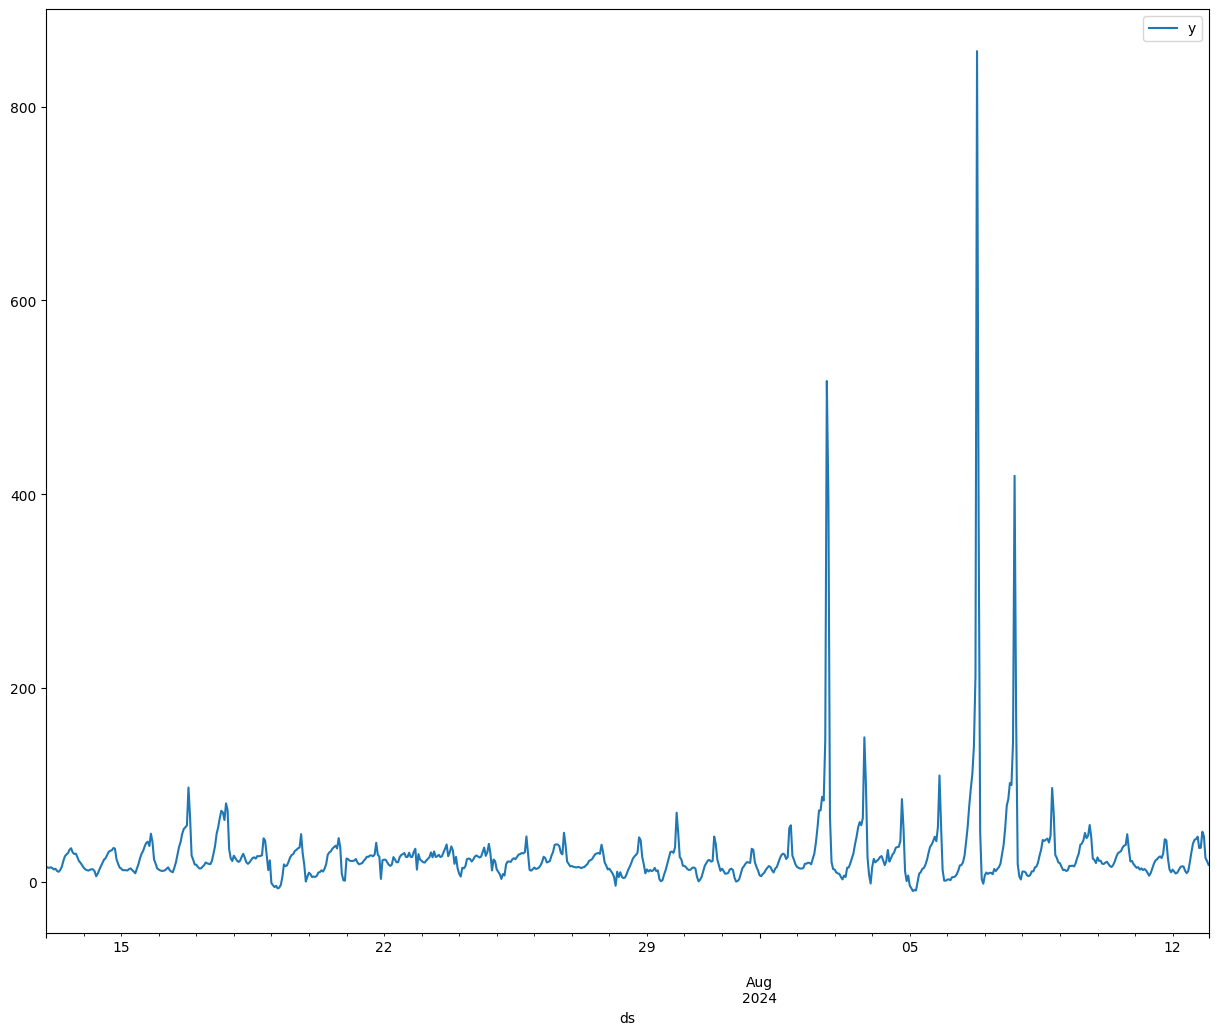

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = da_data.set_index('ds').plot(figsize=(15, 12))

Building Neural Prophet

In [8]:
from neuralprophet import NeuralProphet
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
# train_data, test_data = train_test_split(da_data, test_size=0.3, shuffle=False)
# train_rtdata, test_rtdata = train_test_split(rt_data, test_size=0.3, shuffle=False)
# Initialize the model
# model_da = NeuralProphet(epochs=450,learning_rate=0.001,
#     batch_size=32)

# # Train the model for Day-Ahead
# metrics = model_da.fit(train_data, freq='H')

# # Generate a forecast
# future = model_da.make_future_dataframe(test_data, periods=0, n_historic_predictions=True)
# forecast_da = model_da.predict(future)




In [10]:
model = NeuralProphet(epochs=450,learning_rate=0.001,
    batch_size=32)
# # Train the model for Real-Time
train_rtdata, test_rtdata = model.split_df(rt_data, valid_p=0.2)
metrics_rt = model.fit(train_rtdata)

# Generate a forecast for Real-Time
future_rt = model.make_future_dataframe(test_rtdata, periods=0, n_historic_predictions=True)
forecast_rt = model.predict(future_rt)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 15min


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.835% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 15min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling y

Training: 0it [00:00, ?it/s]

WARNING - (NP.data.splitting._make_future_dataframe) - Not extending df into future as no periods specified. You can skip this and predict directly instead.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.338% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._sho

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [11]:

print(test_rtdata)
print(forecast_rt)

                      ds      y
1303 2024-08-11 12:30:00  13.91
1304 2024-08-11 12:45:00  12.70
1305 2024-08-11 13:00:00  12.89
1306 2024-08-11 13:15:00  11.00
1307 2024-08-11 13:30:00   7.55
...                  ...    ...
1473 2024-08-13 01:00:00  32.64
1474 2024-08-13 01:15:00  35.45
1475 2024-08-13 01:30:00  36.35
1476 2024-08-13 01:45:00  30.73
1477 2024-08-13 02:00:00  36.06

[151 rows x 2 columns]
                     ds      y      yhat1      trend  season_daily
0   2024-08-11 12:30:00  13.91  23.474751  26.596432     -3.121680
1   2024-08-11 12:45:00  12.70  23.283459  26.620144     -3.336691
2   2024-08-11 13:00:00  12.89  22.386738  26.643856     -4.257117
3   2024-08-11 13:15:00  11.00  21.123760  26.667568     -5.543805
4   2024-08-11 13:30:00   7.55  19.630756  26.691273     -7.060522
..                  ...    ...        ...        ...           ...
146 2024-08-13 01:00:00  32.64  62.749149  30.058384     32.690762
147 2024-08-13 01:15:00  35.45  56.199535  30.082096    

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_data['y'], forecast_da['yhat1'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(test_data['y'], forecast_da['yhat1'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 19.512864708559853
Mean Squared Error (MSE): 4684.068241501418
Root Mean Squared Error (RMSE): 68.44025307888201


In [57]:

forecast_rt['yhat1'] = np.expm1(forecast_rt['yhat1'])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_rtdata['y'], forecast_rt['yhat1'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(test_rtdata['y'], forecast_rt['yhat1'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 13.972999356503516
Mean Squared Error (MSE): 344.49085749344357
Root Mean Squared Error (RMSE): 18.56046490509986


In [14]:
# Create a future dataframe for the next 24 hours
future = model.make_future_dataframe(da_data, periods=24)

# Generate predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat1']].tail(24))


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.866% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is depreca

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


                    ds      yhat1
0  2024-08-13 04:15:00  16.670784
1  2024-08-13 04:30:00  19.373985
2  2024-08-13 04:45:00  21.824421
3  2024-08-13 05:00:00  23.454121
4  2024-08-13 05:15:00  24.297863
5  2024-08-13 05:30:00  24.230000
6  2024-08-13 05:45:00  23.379200
7  2024-08-13 06:00:00  21.952534
8  2024-08-13 06:15:00  20.155521
9  2024-08-13 06:30:00  17.880550
10 2024-08-13 06:45:00  16.025505
11 2024-08-13 07:00:00  14.411320
12 2024-08-13 07:15:00  13.205017
13 2024-08-13 07:30:00  12.302250
14 2024-08-13 07:45:00  11.709473
15 2024-08-13 08:00:00  11.177883
16 2024-08-13 08:15:00  11.199406
17 2024-08-13 08:30:00  11.061977
18 2024-08-13 08:45:00  11.056068
19 2024-08-13 09:00:00  11.066521
20 2024-08-13 09:15:00  10.977016
21 2024-08-13 09:30:00  11.103027
22 2024-08-13 09:45:00  11.084824
23 2024-08-13 10:00:00  11.575848


In [64]:
# Create a future dataframe for the next 24 hours
future_rt = model.make_future_dataframe(rt_data, periods=36)

# Generate predictions
forecast_rt = model.predict(future_rt)
forecast_da = forecast_da[['ds', 'yhat1']].tail(36)
# Display the forecast
forecast_rt = forecast_rt[['ds', 'yhat1']].tail(36)


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.868% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequ

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 490.68it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [15]:
fig_forecast = model.plot(forecast)
plt.show()

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



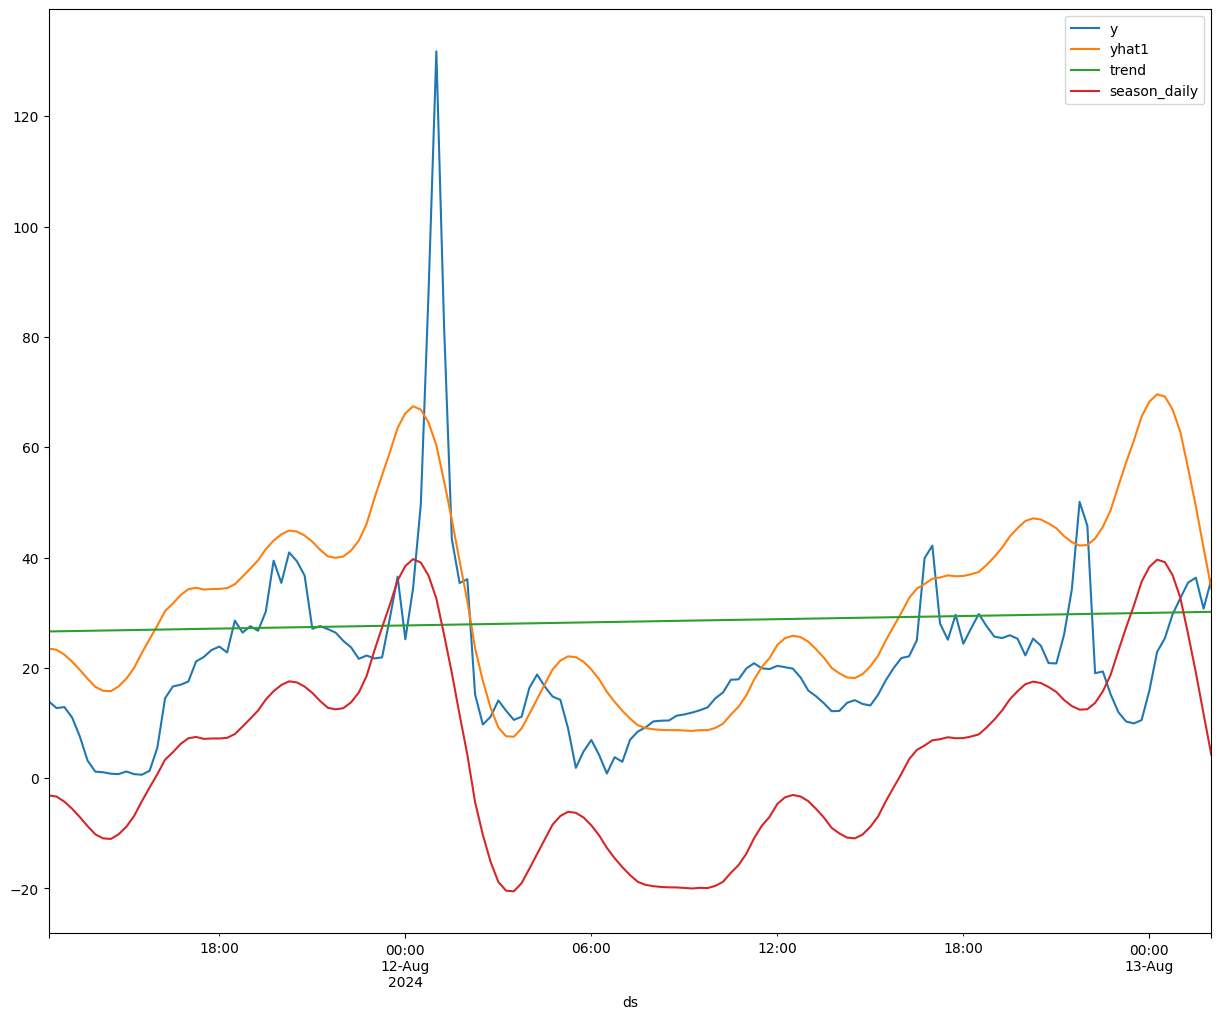

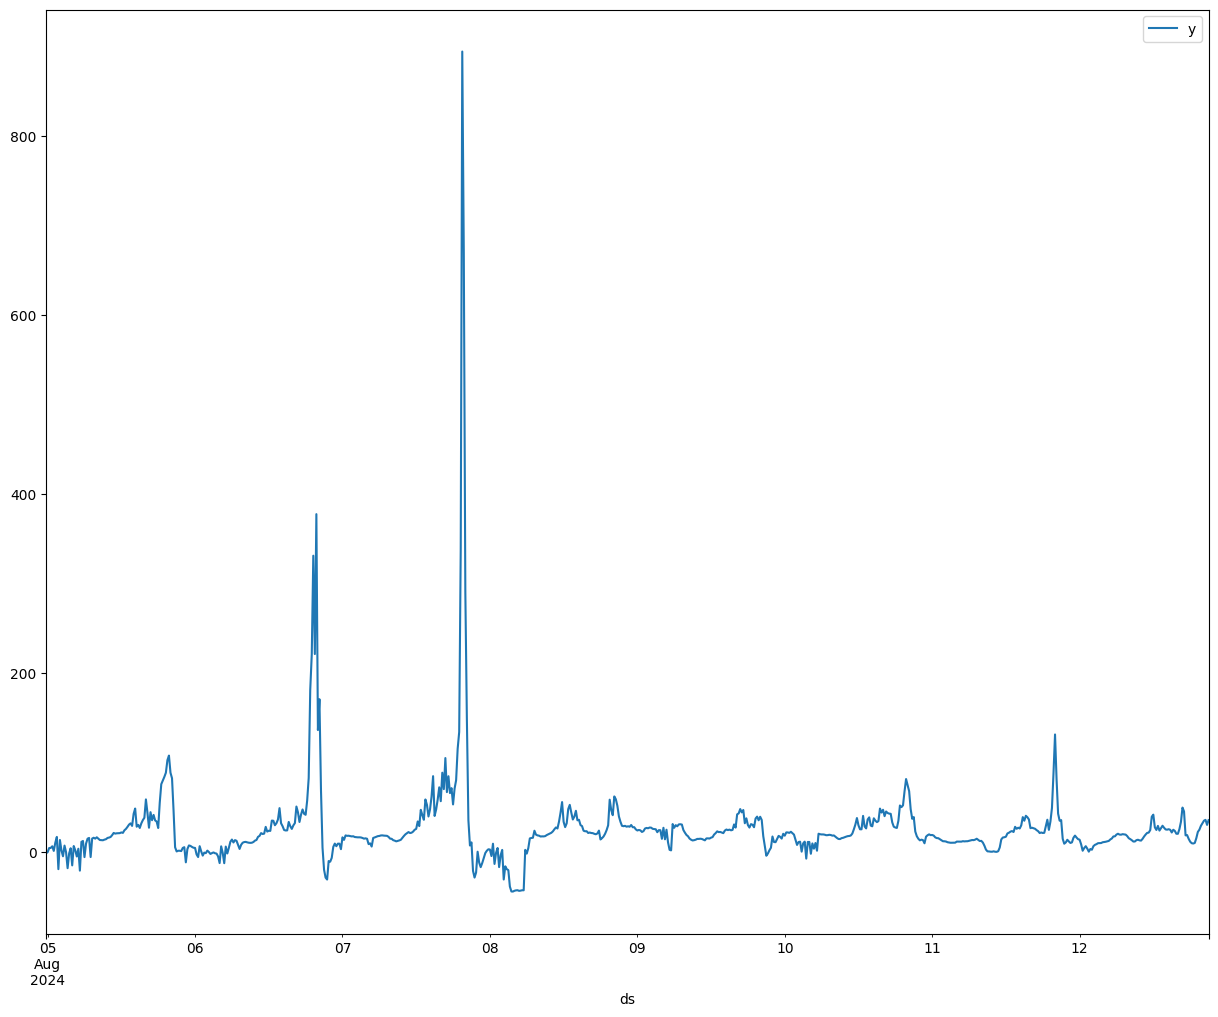

In [13]:
ax = forecast_rt.set_index('ds').plot(figsize=(15, 12))
ax = rt_data.set_index('ds').plot(figsize=(15, 12))

In [65]:
forecast_da.to_csv('da_forecast.csv', index=False)
forecast_rt.to_csv('rt_forecast.csv', index=False)
